In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
data = pd.read_csv('dataset/Countries.csv')

In [3]:
data.head()

,name,Longitude,Latitude
0,Aruba,-69.982677,12.520880
1,Afghanistan,66.004734,33.835231
2,Angola,17.537368,-12.293361
3,Anguilla,-63.064989,18.223959
4,Albania,20.049834,41.142450


In [4]:
data.describe()

,Longitude,Latitude
count,241.000000,241.000000
mean,14.215380,17.169377
std,72.013654,26.554014
min,-177.348348,-80.508579
25%,-36.433184,1.358761
50%,18.644925,17.277500
75%,47.587005,39.115541
max,171.484924,74.710513


In [5]:
x = data.iloc[:, 1:3]

In [6]:
x.head()

,Longitude,Latitude
0,-69.982677,12.520880
1,66.004734,33.835231
2,17.537368,-12.293361
3,-63.064989,18.223959
4,20.049834,41.142450


In [7]:
from sklearn.cluster import KMeans
Kmeans = KMeans(7)
Kmeans.fit(x)

KMeans(n_clusters=7)

In [8]:
identified_clusters = Kmeans.fit_predict(x)
identified_clusters

array([2, 5, 1, 2, 4, 4, 4, 5, 2, 5, 0, 1, 3, 1, 2, 3, 4, 5, 1, 4, 6, 6,
       5, 4, 5, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 3, 5, 1, 6, 4, 2, 5, 6, 6,
       1, 6, 0, 2, 1, 6, 2, 2, 2, 2, 4, 4, 4, 4, 1, 2, 4, 2, 6, 2, 4, 1,
       4, 4, 1, 4, 3, 2, 4, 4, 3, 6, 4, 4, 4, 6, 6, 6, 6, 6, 4, 2, 4, 2,
       3, 2, 3, 1, 2, 4, 2, 4, 3, 4, 5, 3, 1, 4, 5, 5, 4, 4, 4, 2, 4, 4,
       3, 5, 5, 1, 5, 3, 2, 2, 3, 4, 5, 3, 4, 6, 4, 2, 4, 5, 1, 4, 4, 4,
       3, 2, 6, 4, 4, 1, 5, 2, 3, 4, 6, 4, 5, 4, 5, 3, 1, 6, 2, 1, 1, 3,
       1, 3, 6, 3, 6, 2, 0, 4, 4, 5, 3, 3, 5, 5, 2, 0, 2, 3, 3, 3, 4, 2,
       3, 4, 2, 4, 0, 5, 4, 5, 1, 6, 5, 1, 1, 6, 3, 6, 6, 3, 6, 2, 4, 1,
       1, 2, 4, 6, 2, 4, 4, 4, 1, 2, 1, 4, 2, 6, 6, 5, 5, 5, 3, 0, 2, 4,
       4, 3, 1, 1, 4, 2, 2, 5, 4, 2, 2, 2, 2, 3, 3, 0, 0, 5, 1, 1, 1])

In [9]:
data_with_clusters = data.copy()
data_with_clusters['Clusters'] = identified_clusters
data_with_clusters

,name,Longitude,Latitude,Clusters
0,Aruba,-69.982677,12.520880,2
1,Afghanistan,66.004734,33.835231,5
2,Angola,17.537368,-12.293361,1
3,Anguilla,-63.064989,18.223959,2
4,Albania,20.049834,41.142450,4
...,...,...,...,...
236,Samoa,-172.164851,-13.753243,0
237,Yemen,47.586762,15.909280,5
238,South Africa,25.083901,-29.000341,1
239,Zambia,27.774759,-13.458242,1


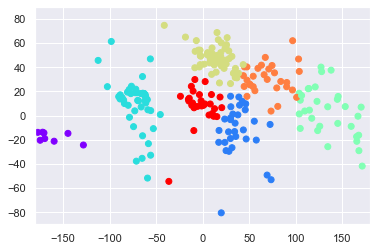

In [10]:
plt.scatter(data_with_clusters['Longitude'], data_with_clusters['Latitude'], c=data_with_clusters['Clusters'], cmap='rainbow')
plt.xlim(-180, 180)
plt.ylim(-90, 90)
plt.show()

In [18]:
wcss = []
for i in range(1,10):
    Kmeans = KMeans(i)
    Kmeans.fit(x)
    wcss_iter = Kmeans.inertia_
    wcss.append(wcss_iter)

D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1039: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'wcss')

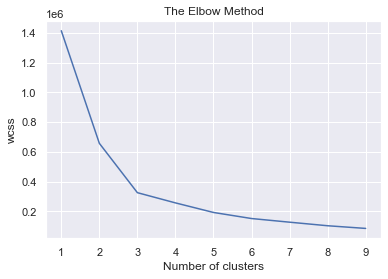

In [19]:
number_of_cluster = range(1,10)
plt.plot(number_of_cluster, wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')

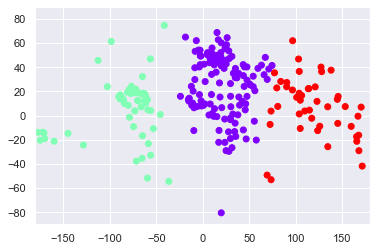

In [20]:
Kmeans = KMeans(3)
Kmeans.fit(x)

identified_clusters = Kmeans.fit_predict(x)

data_with_clusters = data.copy()
data_with_clusters['Clusters'] = identified_clusters
data_with_clusters

plt.scatter(data_with_clusters['Longitude'], data_with_clusters['Latitude'], c=data_with_clusters['Clusters'], cmap='rainbow')
plt.xlim(-180, 180)
plt.ylim(-90, 90)
plt.show()